# Assignment-18-Forecasting-Airlines

In [1]:
# load libraries
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read dataset
df = pd.read_excel('dataset/Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [5]:
# Extract Month
df['month'] = df['Month'].dt.strftime('%b')
# Extract Year
df['year'] = df['Month'].dt.strftime('%Y')

In [6]:
df

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


<AxesSubplot:xlabel='month', ylabel='year'>

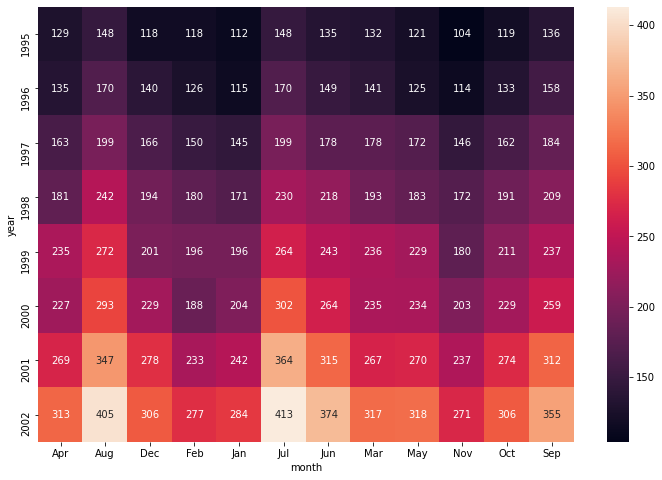

In [7]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='month', ylabel='Passengers'>

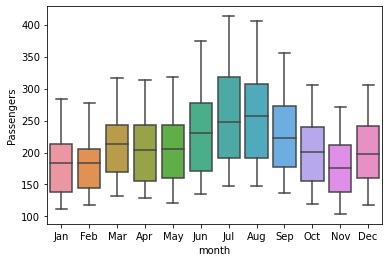

In [8]:
# Boxplots
sns.boxplot(x="month",y="Passengers",data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

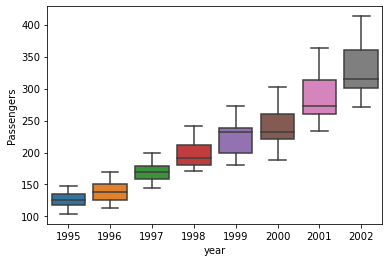

In [9]:
sns.boxplot(x="year",y="Passengers",data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

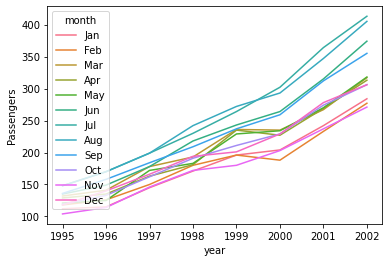

In [10]:
sns.lineplot(x='year',y='Passengers',hue='month',data=df)

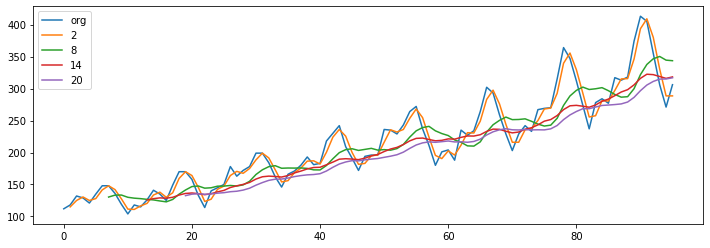

In [11]:
# Moving Average
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
for i in range(2,24,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

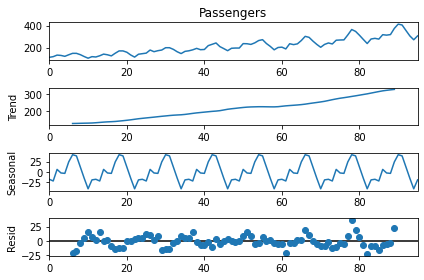

In [12]:
# Time series decomposition plot
decompose_result = seasonal_decompose(df.Passengers,period=12)
decompose_result.plot()
plt.show()

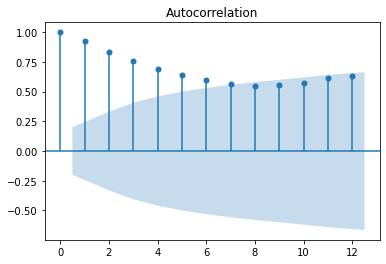

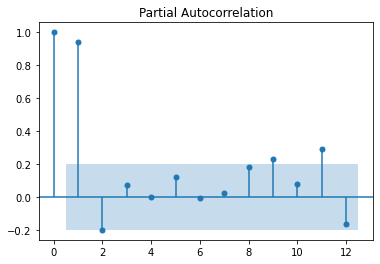

In [13]:
# ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()

In [14]:
df["t"] = np.arange(1,len(df)+1)
df["t_squared"] = df["t"]*df["t"]
df["log_passengers"] = np.log(df["Passengers"])

In [15]:
df['year'] = df['year'].astype(int)

In [16]:
#one hot encoding
ohe = ce.OneHotEncoder(cols=['month'])
df=ohe.fit_transform(df)
df

,Month,Passengers,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year,t,t_squared,log_passengers
0,1995-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0,1995,1,1,4.718499
1,1995-02-01,118,0,1,0,0,0,0,0,0,0,0,0,0,1995,2,4,4.770685
2,1995-03-01,132,0,0,1,0,0,0,0,0,0,0,0,0,1995,3,9,4.882802
3,1995-04-01,129,0,0,0,1,0,0,0,0,0,0,0,0,1995,4,16,4.859812
4,1995-05-01,121,0,0,0,0,1,0,0,0,0,0,0,0,1995,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,0,0,0,0,0,0,1,0,0,0,0,2002,92,8464,6.003887
92,2002-09-01,355,0,0,0,0,0,0,0,0,1,0,0,0,2002,93,8649,5.872118
93,2002-10-01,306,0,0,0,0,0,0,0,0,0,1,0,0,2002,94,8836,5.723585
94,2002-11-01,271,0,0,0,0,0,0,0,0,0,0,1,0,2002,95,9025,5.602119


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           96 non-null     datetime64[ns]
 1   Passengers      96 non-null     int64         
 2   month_1         96 non-null     int64         
 3   month_2         96 non-null     int64         
 4   month_3         96 non-null     int64         
 5   month_4         96 non-null     int64         
 6   month_5         96 non-null     int64         
 7   month_6         96 non-null     int64         
 8   month_7         96 non-null     int64         
 9   month_8         96 non-null     int64         
 10  month_9         96 non-null     int64         
 11  month_10        96 non-null     int64         
 12  month_11        96 non-null     int64         
 13  month_12        96 non-null     int64         
 14  year            96 non-null     int64         
 15  t       

### Split Dataset in train and test

In [18]:
train = df.iloc[:int(df.shape[0]*0.80)]
test = df.iloc[int(df.shape[0]*0.80):]

### Linear Model

In [19]:
linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = mean_squared_error(pred_linear,test.Passengers,squared=False)
rmse_linear

57.000147882565855

### Exponential

In [20]:
Exp = smf.ols('log_passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = mean_squared_error(pred_linear,test.Passengers,squared=False)
rmse_Exp

57.000147882565855

### Quadratic

In [21]:
Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = mean_squared_error(pred_Quad,test.Passengers,squared=False)
rmse_Quad

58.494274639472565

### Additive seasonality

In [22]:
add_sea = smf.ols('Passengers~month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']]))
rmse_add_sea = mean_squared_error(pred_add_sea,test.Passengers,squared=False)
rmse_add_sea

132.25413439949472

### Additive Seasonality Quadratic

In [23]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','t','t_squared']]))
rmse_add_sea_quad = mean_squared_error(pred_add_sea,test.Passengers,squared=False)
rmse_add_sea_quad

132.25413439949472

### Multiplicative Seasonality

In [24]:
Mul_sea = smf.ols('log_passengers~month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = mean_squared_error(pred_Mult_sea,test.Passengers,squared=False)
rmse_Mult_sea

314.92426103796834

### Multiplicative Additive Seasonality

In [25]:
Mul_Add_sea = smf.ols('log_passengers~t+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = mean_squared_error(pred_Mult_add_sea,test.Passengers,squared=False)
rmse_Mult_add_sea 

314.3955250420763

### Simple Exponential Method

In [26]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
rmse_ses = mean_squared_error(pred_ses,test.Passengers,squared=False)
rmse_ses

82.11594314672773

### Holt method

In [27]:
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
rmse_hw = mean_squared_error(pred_hw,test.Passengers,squared=False)
rmse_hw

47.98872996524173

### Holts winter exponential smoothing with additive seasonality and additive trend

In [28]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_add_add = mean_squared_error(pred_hwe_add_add,test.Passengers,squared=False)
rmse_hwe_add_add

37.73584203686617

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [29]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_mul_add = mean_squared_error(pred_hwe_mul_add,test.Passengers,squared=False)
rmse_hwe_mul_add

33.87780055343501

### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [30]:
hwe_model_mul_mul = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_mul_mul = mean_squared_error(pred_hwe_mul_mul,test.Passengers,squared=False)
rmse_hwe_mul_mul

23.457927438531545

In [31]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear",
                           "rmse_Exp",
                           "rmse_Quad",
                           "rmse_add_sea",
                           "rmse_add_sea_quad",
                           "rmse_Mult_sea",
                           "rmse_Mult_add_sea",
                           "rmse_ses",
                           "rmse_hw",
                           "rmse_hwe_add_add",
                           "rmse_hwe_mul_add",
                           "rmse_hwe_mul_mul"]),
        "RMSE_Values":pd.Series([rmse_linear,
                                 rmse_Exp,
                                 rmse_Quad,
                                 rmse_add_sea,
                                 rmse_add_sea_quad,
                                 rmse_Mult_sea,
                                 rmse_Mult_add_sea,
                                 rmse_ses,
                                 rmse_hw,
                                 rmse_hwe_add_add,
                                 rmse_hwe_mul_add,
                                 rmse_hwe_mul_mul])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
11,rmse_hwe_mul_mul,23.457927
10,rmse_hwe_mul_add,33.877801
9,rmse_hwe_add_add,37.735842
8,rmse_hw,47.988730
0,rmse_linear,57.000148
1,rmse_Exp,57.000148
2,rmse_Quad,58.494275
7,rmse_ses,82.115943
3,rmse_add_sea,132.254134
4,rmse_add_sea_quad,132.254134


### Final Model by combining train and test

In [32]:
hwe_model_mul_mul = ExponentialSmoothing(df["Passengers"],seasonal="mul",trend="mul",seasonal_periods=12).fit()

In [33]:
#Forecasting for next 10 time periods
hwe_model_mul_mul.forecast(10)

96     315.018662
97     311.708006
98     361.240194
99     352.909457
100    354.363905
101    403.881139
102    450.858716
103    445.620402
104    395.601012
105    347.198946
dtype: float64